# Integração Numérica: Regras de Newton-Cotes

As fórmulas de Newton-Cotes são os esquemas mais comuns de integração numérica. Elas são baseadas na estratégia de substituir uma função complicada ou dados tabulados por uma função aproximadora simples que seja fácil de integrar:

$$
I = \int _a^b f(x)dx \cong \int _a^b f_n (x)dx \qquad (1)
$$

em que $f_n (x)$ é um polinômio da forma

$$
f_n (x) = a_0 + a_1 x + \dots + a_{n-1} x^{n-1} + a_n x^n
$$

em que $n$ é o grau do polinômio.

## A Regra do Trapézio

A **regra do trapézio** corresponde ao caso no qual o polinômio na Equação (1) é de primeiro grau:

$$
I = \int _a^b f(x)dx \cong \int _a^b f_1 (x)dx
$$

onde

$$
f_1 (x) = f(a) + \dfrac{f(b) - f(a)}{b - a} (x - a)
$$

O resultado da integração é 

$$
I = (b - a) \dfrac{f(a) + f(b)}{2} \qquad (2)
$$

Geometricamente, a regra dos trapézios é equivalente a aproximar a integral pela área do trapézio sob a reta ligando $f(a)$ e $f(b)$ (conforme figura abaixo). Portanto, a estimativa da integral pode ser representada por

$$
I \cong \text{largura} \times \text{altura média} \\
I \cong (b - a) \times \text{altura média}
$$

em que, para a regra dos trapézios, a altura média é a média dos valores da função nas extremidades, ou $[f (a) + f (b)]/2$, conforme Equação (2).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import scipy as sp
from scipy import interpolate
from scipy import integrate
%matplotlib inline

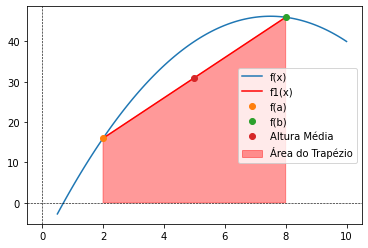

In [3]:
# Representação geométrica da regra do trapézio

def f(x):
    return -x**2 + 15*x - 10

x = np.linspace(0.5,10,100)
y = f(x)

plt.plot(x,y, label = 'f(x)')
plt.plot([2,8], [f(2),f(8)], 'r', label = 'f1(x)')
plt.plot(2,f(2), 'o', label = 'f(a)')
plt.plot(8,f(8), 'o', label = 'f(b)')
plt.plot(np.mean([2,8]), np.mean([f(2),f(8)]), 'o', label = 'Altura Média')
plt.fill([2, 2, 8, 8],[0, f(2), f(8), 0],color='r',alpha=0.4, label = 'Área do Trapézio')
plt.legend()
plt.axvline(x=0,color='k',linewidth=0.6,linestyle='--')
plt.axhline(y=0,color='k',linewidth=0.6,linestyle='--');

## Aplicação Múltipla da Regra do Trapézio

Uma maneira de melhorar a acurácia da regra do trapézio é dividir o intervalo de integração de $a$ a $b$ em diversos segmentos e aplicar o método a cada segmento (conforme figura abaixo). As áreas correspondentes aos segmentos individuais podem então ser somadas parafornecer a integral para o intervalo inteiro. As equações resultantes são chamadas fórmulas de integração por aplicações múltiplas ou compostas.

Existem $n + 1$ pontos base igualmente espaçados $(x_0, x_1, x_2, \dots , x_n)$. Consequentemente, existem $n$ segmentos de largura igual:

$$
h = \dfrac{b − a}{n} \qquad (3)
$$

Se $a$ e $b$ forem designados por $x_0$ e $x_n$, respectivamente, a integral total pode ser representada como

$$
I = \int _{x_0}^{x_1} f(x)dx + \int _{x_1}^{x_2} f(x)dx + \dots + \int _{x_{n - 1}}^{x_n} f(x)dx 
$$

Substituindo cada integral pela regra do trapézio, obtém-se

$$
I = h \dfrac{f(x_0) + f(x_1)}{2} + h \dfrac{f(x_1) + f(x_2)}{2} + \dots + h \dfrac{f(x_{n - 1}) + f(x_n)}{2}
$$

ou, agrupando termos,

$$
I = \dfrac{h}{2} \left[ f(x_0) + 2 \sum _{i = 1} ^{n - 1} f(x_i) + f(x_n) \right] \qquad (4)
$$

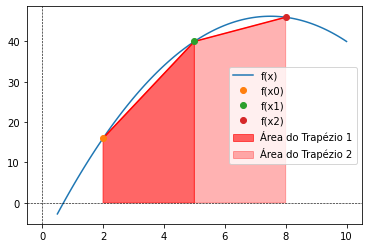

In [4]:
# Representação geométrica da aplicação múltipla da regra do trapézio
# É possível observar, visualmente, que houve uma redução do erro do resultado em comparação com o caso anterior

xd = np.array([2,5,8])
yd = f(xd)

plt.plot(x,y, label = 'f(x)')
plt.plot(xd,yd, 'r')
plt.plot(2,f(2), 'o', label = 'f(x0)')
plt.plot(5,f(5), 'o', label = 'f(x1)')
plt.plot(8,f(8), 'o', label = 'f(x2)')
plt.fill([2, 2, 5, 5],[0, f(2), f(5), 0], color='r', alpha=0.6, label = 'Área do Trapézio 1')
plt.fill([5, 5, 8, 8],[0, f(5), f(8), 0], color='r', alpha=0.3, label = 'Área do Trapézio 2')
plt.legend()
plt.axvline(x=0,color='k',linewidth=0.6,linestyle='--')
plt.axhline(y=0,color='k',linewidth=0.6,linestyle='--'); 

## A Regra 1/3 de Simpson

A **regra 1/3 de Simpson** é obtida quando um polinômio interpolador de segundo grau é substituído na Equação (1):

$$
I = \int _a^b f(x)dx \cong \int _a^b f_2 (x)dx
$$

Se $a$ e $b$ forem designados por $x_0$ e $x_2$ e se $f_2(x)$ for representado por um polinômio de Lagrange de segundo grau, a integral se torna

$$
I = \int _{x_0}^{x_2} \left[ \dfrac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} f(x_0) + \dfrac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} f(x_1) + \dfrac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} f(x_2) \right] dx
$$

Depois da integração e de manipulações algébricas, obtém-se a seguinte fórmula:

$$
I \cong \dfrac{h}{3} [f(x_0) + 4 f(x_1) + f(x_2)] \qquad (5)
$$

em que, para esse caso

$$
h = \dfrac{b − a}{2} \qquad (6)
$$

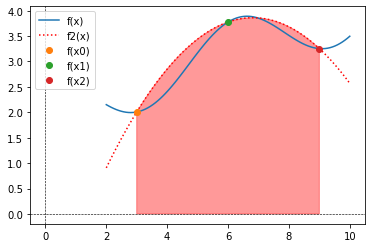

In [5]:
# Descrição gráfica da regra 1/3 de Simpson: ela consiste em tomar a área sob uma parábola ligando três pontos

def f(x):
    return 0.6*np.sin(x+np.pi/2) + 0.2*x + 2

def f2(x):
    return -0.127382111059529*x**2 + 1.73647155618593*x - 2.0569711669823 # Obtido pelo MMQ

x = np.linspace(2,10,100)
y = f(x)

xc = np.linspace(2,10,100)
yc = f2(xc)

xf = np.linspace(3,9,100)
yf = f2(xf)

xf = np.concatenate((np.array([3]), xf, np.array([9])))
yf = np.concatenate((np.array([0]), yf, np.array([0])))

plt.plot(x,y, label = 'f(x)')
plt.plot(xc,yc, ':r', label = 'f2(x)')
plt.plot(3,f(3), 'o', label = 'f(x0)')
plt.plot(6,f(6), 'o', label = 'f(x1)')
plt.plot(9,f(9), 'o', label = 'f(x2)')
plt.fill(xf,yf, color='r', alpha=0.4)
plt.legend()
plt.axvline(x=0,color='k',linewidth=0.6,linestyle='--')
plt.axhline(y=0,color='k',linewidth=0.6,linestyle='--');

## Aplicações Múltiplas da Regra 1/3 de Simpson

Do mesmo modo como no caso da regra do trapézio, a regra de Simpson pode ser melhorada dividindo-se o intervalo de integração em diversos segmentos de mesmo comprimento

$$
h = \dfrac{b − a}{2}
$$

A integral total pode ser representada como

$$
I = \int _{x_0}^{x_2} f(x)dx + \int _{x_2}^{x_4} f(x)dx + \dots + \int _{x_{n - 2}}^{x_n} f(x)dx 
$$

Substituindo cada integral individual pela regra 1/3 de Simpson, obtemos

$$
I \cong 2 h \dfrac{f(x_0) + 4 f(x_1) + f(x_2)}{6} + 2 h \dfrac{f(x_2) + 4 f(x_3) + f(x_4)}{6} + \dots + 2 h \dfrac{f(x_{n - 2}) + 4 f(x_{n - 1}) + f(x_n)}{6}
$$

ou 

$$
I \cong (b - a) \dfrac{ f(x_0) + 4 \sum _{i = 1, 3, 5}^{n-1} f(x_i) + 2 \sum _{i = 2, 4, 6}^{n-2} f(x_j) + f(x_n) }{3 n} \qquad (7)
$$

## Regra 3/8 de Simpson

De uma maneira parecida com a dedução da regra do trapézio e da regra 1/3 de Simpson, um polinômio de Lagrange de ordem três pode ser ajustado a quatro pontos e integrado

$$
I = \int _a^b f(x)dx \cong \int _a^b f_3 (x)dx
$$

para fornecer

$$
I \cong \dfrac{3 h}{8} [f(x_0) + 3 f(x_1) + 3 f(x_2) + f(x_3)] \qquad (8)
$$

em que

$$
h = \dfrac{b − a}{3} \qquad (9)
$$

Essa equação é chamada regra 3/8 de Simpson porque $h$ é multiplicada por 3/8.

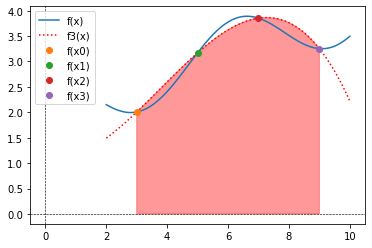

In [6]:
# Descrição gráfica da regra 3/8 de Simpson: ela consiste em tomar a área sob uma equação cúbica ligando quatro pontos

def f3(x):
    return -0.0166482246490701*x**3 + 0.189467273747325*x**2 - 0.117878777555138*x + 1.10393743650415 # Obtido pelo MMQ

xc = np.linspace(2,10,100)
yc = f3(xc)

xf = np.linspace(3,9,100)
yf = f3(xf)

xf = np.concatenate((np.array([3]), xf, np.array([9])))
yf = np.concatenate((np.array([0]), yf, np.array([0])))

plt.plot(x,y, label = 'f(x)')
plt.plot(xc,yc, ':r', label = 'f3(x)')
plt.plot(3, f(3), 'o', label = 'f(x0)')
plt.plot(5, f(5), 'o', label = 'f(x1)')
plt.plot(7, f(7), 'o', label = 'f(x2)')
plt.plot(9, f(9), 'o', label = 'f(x3)')
plt.fill(xf,yf, color='r', alpha=0.4)
plt.legend()
plt.axvline(x=0,color='k',linewidth=0.6,linestyle='--')
plt.axhline(y=0,color='k',linewidth=0.6,linestyle='--');

## Integração com Segmentos Desiguais

Até esse ponto, todas as fórmulas para integração numérica foram baseadas em dados igualmente espaçados. Na prática, existem muitas situações nas quais essa hipótese não é válida e precisamos lidar com segmentos de tamanhos distintos. Por exemplo, dados obtidos experimentalmente, muitas vezes, são desse tipo. Para tais casos, um método é aplicar a regra do trapézio para cada segmento e somar os resultados:

$$
I = h_1 \dfrac{f(x_0) + f(x_1)}{2} + h_2 \dfrac{f(x_1) + f(x_2)}{2} + \dots + h_n \dfrac{f(x_{n - 1}) + f(x_n)}{2}
$$

em que $h_i$ é a largura do segmento $i$.

## Implementações de Newton-Cotes: Regra do Trapézio e 1/3 Simpson Generalizadas

In [8]:
''' Newton-Cotes: Regra do Trapezio
    assume Y igualmente espaçado e 
    com pelo menos 2 pontos 
'''
def integral_trapezio(h,Y):
    val = 0.0
    for i in range(1,Y.size-1):
        val += 2*Y[i]
    val = 0.5*h*( val + Y[0] + Y[-1] )
    return val

''' Newton-Cotes: Regra 1/3 de Simpson
    assume Y igualmente espaçado e 
    com pelo menos 3 pontos 
'''
def integral_onethird_simpson(h,Y):
    val = 0.0
    for i in range(1,Y.size-1,2):
        val += 4*Y[i]
    
    for i in range(2,Y.size-2,2):
        val += 2*Y[i]        
    
    val = h/3.0*( val + Y[0] + Y[-1] )
    return val

''' HELPER''' 
def print_metodo(flag):            
    print('*** Método de integração: ' + str.upper(flag) + ' ***')

# limites de integração
a = 0
b = 93

# integrando 
f = lambda v: 97000*v/(5*v**2 + 570000)

# pontos de integração (ímpares para testar com 1/3 simpson)
npi = [11,101,1001,10001,100001]

# integral exata
x = sy.Symbol('x')
vex = sy.integrate(f(x),(x,a,b))
print('Ingegral exata (simbólica): ' + str(vex))
vex = float(vex)
print('Integral exata (numérica): ' + str(vex))

metodos = ['trapezio','13simpson']
no = False

# integração numérica
for metodo in metodos:
    I = []
    EREL = []
    for n in npi:
        v = np.linspace(a,b,num=n,endpoint=True)
        fv = f(v)
        h = (b-a)/n    
                
        if metodo == 'trapezio':
            if no == False:
                print_metodo(metodo)
                no = True            
            val = integral_trapezio(h,fv)
            erel = abs((vex - val)/vex)*100
            I.append(val)
            EREL.append(erel)
            print("no. de pontos de integração = {0:d} \t I = {1:.10f} \t EREL = {2:.10f}%".format(n,val,erel) )

        elif metodo == '13simpson':
            if no == False:
                print_metodo(metodo)
                no = True
            val = integral_onethird_simpson(h,fv)
            erel = abs((vex - val)/vex)*100
            I.append(val)
            EREL.append(erel)        
            print("no. de pontos de integração = {0:d} \t I = {1:.10f} \t EREL = {2:.10f}%".format(n,val,erel) )
    
    no = False


Ingegral exata (simbólica): -9700*log(114000) + 9700*log(122649)
Integral exata (numérica): 709.3432392521672
*** Método de integração: TRAPEZIO ***
no. de pontos de integração = 11 	 I = 644.6326388025 	 EREL = 9.1226076276%
no. de pontos de integração = 101 	 I = 702.3175905243 	 EREL = 0.9904441657%
no. de pontos de integração = 1001 	 I = 708.6345799441 	 EREL = 0.0999035825%
no. de pontos de integração = 10001 	 I = 709.2723117737 	 EREL = 0.0099990350%
no. de pontos de integração = 100001 	 I = 709.3361458882 	 EREL = 0.0009999903%
*** Método de integração: 13SIMPSON ***
no. de pontos de integração = 11 	 I = 644.8576901994 	 EREL = 9.0908809000%
no. de pontos de integração = 101 	 I = 702.3200388852 	 EREL = 0.9900990068%
no. de pontos de integração = 1001 	 I = 708.6346046475 	 EREL = 0.0999000999%
no. de pontos de integração = 10001 	 I = 709.2723120210 	 EREL = 0.0099990001%
no. de pontos de integração = 100001 	 I = 709.3361458907 	 EREL = 0.0009999900%


### Tarefa
Implemente uma função para realizar a integração numérica pela regra 3/8 de Simpson, use-a para calcular o valor de 

$$\int_{a=0}^{b=93} \frac{97000v}{(5v^2 + 570000)} \, dx$$ 

e compare o resultado com os obtidos pelas anteriores.

## Integração simbólica 

Vamos ver alguns exemplos de integração simbólica. Para termos uma impressão mais elegante de expressões, antes usamos a seguinte instrução:

In [7]:
sy.init_printing()

### Regra quadratura de Simpson

Vamos usar símbolos para chegar à expressão da regra de quadratura de Simpson.

In [8]:
a,b,X = sy.symbols("a, b, x")
f = sy.Function("f")

Definimos tuplas para os pontos de amostra e pesos.

In [9]:
x = a, (a + b)/2, b # ponto médio 
w = [sy.symbols("w_%d" % i) for i in range(len(x))] # pesos 

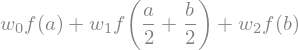

In [10]:
q = sum([w[i] * f(x[i]) for i in range(len(x))])
q

Para calcular valores aproximados dos pesos $w_i$, escolhemos a base polinomial 

$$\{ \phi_n(x) = x^n \}_{n=0}^2$$

para a interpolação de $f(x)$ e um objeto simbólico para representar cada uma dessas funções.

In [11]:
phi = [sy.Lambda(X, X**n) for n in range(len(x))]
phi

Agora temos que descobrir os valores dos pesos. A integral $\int_a^b \phi_n(x) \, dx$ pode ser calculada analiticamente para cada função de base. Isto nos ajuda a resolver o seguinte sistema:

$$\sum\limits_{i=0}^2 w_i \phi_n(x_i) = \int_a^b \phi_n(x) \, dx$$

O sistema pode ser construído no `sympy` da seguinte forma: 

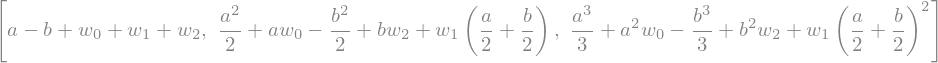

In [12]:
eqs = [q.subs(f, phi[n]) - sy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]
eqs

Em seguida, resolvemos o sistema para obter as expressões analíticas para os pesos:  

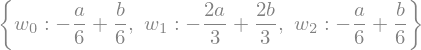

In [13]:
w_sol = sy.solve(eqs,w)
w_sol

Substituindo a solução na expressão simbólica para a regra de quadratura:

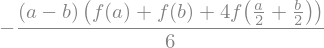

In [14]:
q.subs(w_sol).simplify()

Podemos verificar no material que esta é, de fato, a expressão para a regra de quadratura de Simpson.

## Integração múltipla

A integração em 2 ou mais variáveis pode ser feita usando as funções `dblquad`, `tplquad` e `nquad`, onde o número de funções e de limites de integração deve se adequar ao tipo de integral.

Abaixo, temos alguns exemplos: 

### Integração dupla

Neste exemplo, integramos 
$$\int_0^1\int_0^1 e^{-x^2 - y^2} \, dx dy$$

In [15]:
integrate.dblquad(lambda x, y: np.exp(-x**2-y**2), 0, 1, lambda x: 0, lambda x: 1)

### Integração tripla

Neste exemplo, integramos 
$$\int_0^1\int_0^1\int_0^1 e^{-x^2 - y^2 - z^2} \, dx dy dz$$

In [16]:
def f(x, y, z): 
    return np.exp(-x**2-y**2-z**2) 

a, b = 0, 1
g, h = lambda x: 0, lambda x: 1
q, r = lambda x, y: 0, lambda x, y: 1
integrate.tplquad(f, 0, 1, g, h, q, r) 